# Causality 

## Correlation vs Causation

**Correlation does not entail causation!**

Two variables are said to be correlated, when they change together, ie, if both variables A and B are rising and falling at the same time periods, they are correlated. However, does the increase in A cause that in B or vice versa? How to test?

Say, we have this hypothetical data:

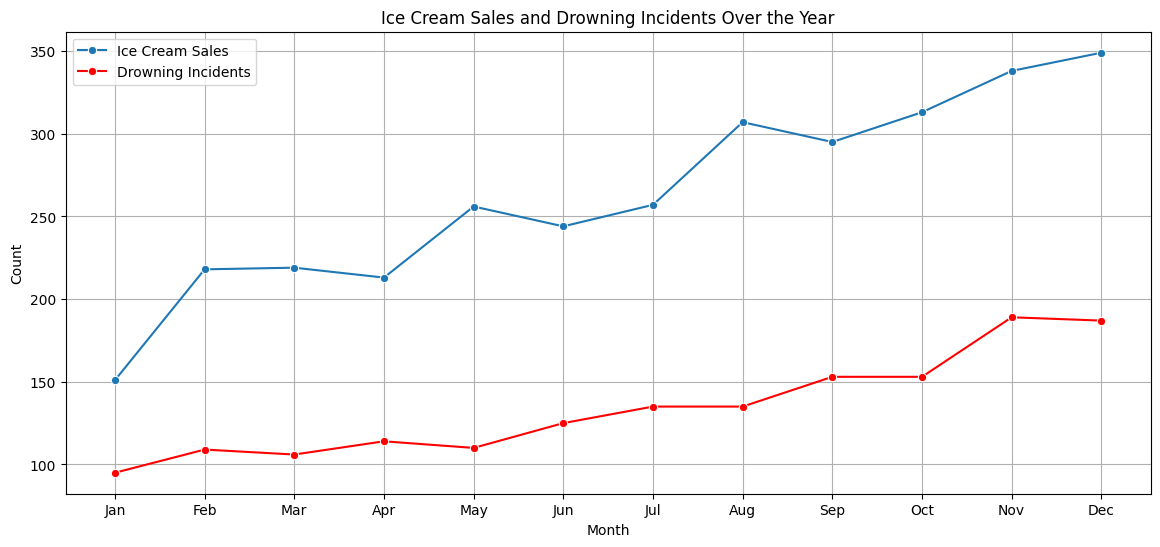

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(0)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temperature = np.sort(np.random.randint(15, 35, 12))  # Temperature from 15 to 35
ice_cream_sales = temperature * 10 + np.random.randint(0, 50, 12)  # Ice cream sales increase with temperature
drowning_incidents = temperature * 5 + np.random.randint(0, 30, 12)  # Drowning incidents increase with temperature

df = pd.DataFrame({'Month': months, 'Temperature': temperature, 'Ice Cream Sales': ice_cream_sales, 'Drowning Incidents': drowning_incidents})

# Plotting
plt.figure(figsize=(14,6))
sns.lineplot(x='Month', y='Ice Cream Sales', data=df, marker='o', label='Ice Cream Sales')
sns.lineplot(x='Month', y='Drowning Incidents', data=df, marker='o', label='Drowning Incidents', color='r')
plt.legend()
plt.title('Ice Cream Sales and Drowning Incidents Over the Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Both ice cream sales and drowning incidents increase and decrease together, showing a correlation. However, neither is likely to cause the other. It's the temperature (a lurking variable) that affects them both.

# TABLES, Rectangular Data, and DataFrames in Python

## Tables & Rectangular Data

In many applications, data is structed in a tabular format: CSV, TSV, Excel, ... files, where:
- **Rows** are individual observations / records.
- **Columns** are the attributes / features of these observations.

## DataFrames and Operations

### 1. Create Dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {
    "brand": ["apple", "samsung", "huawei","xiaomi", "oppo","casper", "apple"],
    "model":["iphone 13","S22","Nova 9","Redmi 10","A55", "Via E30", "iphone 14"],
    "price":[27000,18000,9000,6400,5800,3800, 33600],
    "operating system":["iOS","Android", "Android", "Android", "Android","Android","iOS"]
             
}

#load data into a dataframe object
df=pd.DataFrame(data)

In [15]:
df

,brand,model,price,operating system
0,apple,iphone 13,27000,iOS
1,samsung,S22,18000,Android
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android
4,oppo,A55,5800,Android
5,casper,Via E30,3800,Android
6,apple,iphone 14,33600,iOS


In [4]:
len(df)

7

### Get head and tail (first and last items)

In [16]:
# by default, head() returns the top 5 rows of the dataframe
df.head()

,brand,model,price,operating system
0,apple,iphone 13,27000,iOS
1,samsung,S22,18000,Android
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android
4,oppo,A55,5800,Android


In [17]:
# get n rows from the top
df.head(3)

,brand,model,price,operating system
0,apple,iphone 13,27000,iOS
1,samsung,S22,18000,Android
2,huawei,Nova 9,9000,Android


In [18]:
# by default, tail() returns the bottom 5 rows of the dataframe
df.tail()

,brand,model,price,operating system
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android
4,oppo,A55,5800,Android
5,casper,Via E30,3800,Android
6,apple,iphone 14,33600,iOS


In [19]:
# get n rows from the bottom
df.tail(3)

,brand,model,price,operating system
4,oppo,A55,5800,Android
5,casper,Via E30,3800,Android
6,apple,iphone 14,33600,iOS


### Get columns 

In [21]:
# get the column names
df.columns

Index(['brand', 'model', 'price', 'operating system'], dtype='object')

In [24]:
# get the brand names
brand=df.brand
brand

0      apple
1    samsung
2     huawei
3     xiaomi
4       oppo
5     casper
6      apple
Name: brand, dtype: object

In [25]:
# get the brand names
brand=df['brand']
brand

0      apple
1    samsung
2     huawei
3     xiaomi
4       oppo
5     casper
6      apple
Name: brand, dtype: object

In [27]:
# get brand and model
df[['brand','model']]

,brand,model
0,apple,iphone 13
1,samsung,S22
2,huawei,Nova 9
3,xiaomi,Redmi 10
4,oppo,A55
5,casper,Via E30
6,apple,iphone 14


### Get the records 

#### .iloc[]  --  Integer-location based indexing

In [30]:
# get the second row
df.iloc[1]

brand               samsung
model                   S22
price                 18000
operating system    Android
Name: 1, dtype: object

In [34]:
# get rows from 1 to 3
df.iloc[1:4]

,brand,model,price,operating system
1,samsung,S22,18000,Android
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android


#### .loc[] -- Label-based indexing

In [35]:
df.loc[1]

brand               samsung
model                   S22
price                 18000
operating system    Android
Name: 1, dtype: object

In [36]:
# get the 2nd and 4th rows
df.iloc[[1,3]]

,brand,model,price,operating system
1,samsung,S22,18000,Android
3,xiaomi,Redmi 10,6400,Android


### Filtering data

In [37]:
# get rows with price less than 10000
df[df.price<10000]

,brand,model,price,operating system
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android
4,oppo,A55,5800,Android
5,casper,Via E30,3800,Android


In [38]:
# get rows with operating system is iOS and price is greater than 10000
df[(df['operating system']=='iOS') & (df['price']>10000)]

,brand,model,price,operating system
0,apple,iphone 13,27000,iOS
6,apple,iphone 14,33600,iOS


### Sorting

In [39]:
# sort the dataframe by price in ascending order
df.sort_values(by='price')

,brand,model,price,operating system
5,casper,Via E30,3800,Android
4,oppo,A55,5800,Android
3,xiaomi,Redmi 10,6400,Android
2,huawei,Nova 9,9000,Android
1,samsung,S22,18000,Android
0,apple,iphone 13,27000,iOS
6,apple,iphone 14,33600,iOS


In [40]:
df

,brand,model,price,operating system
0,apple,iphone 13,27000,iOS
1,samsung,S22,18000,Android
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android
4,oppo,A55,5800,Android
5,casper,Via E30,3800,Android
6,apple,iphone 14,33600,iOS


In [41]:
# sort the dataframe by price inplace
df.sort_values(by='price', inplace=True)

In [ ]:
df2 = df.sort_values(by='price')

In [42]:
df

,brand,model,price,operating system
5,casper,Via E30,3800,Android
4,oppo,A55,5800,Android
3,xiaomi,Redmi 10,6400,Android
2,huawei,Nova 9,9000,Android
1,samsung,S22,18000,Android
0,apple,iphone 13,27000,iOS
6,apple,iphone 14,33600,iOS


In [43]:
# sort the dataframe by price in descending order
df.sort_values(by='price', ascending=False)

,brand,model,price,operating system
6,apple,iphone 14,33600,iOS
0,apple,iphone 13,27000,iOS
1,samsung,S22,18000,Android
2,huawei,Nova 9,9000,Android
3,xiaomi,Redmi 10,6400,Android
4,oppo,A55,5800,Android
5,casper,Via E30,3800,Android


### Add labels to each row

In [44]:
# Add a list of names to give each row a name
df=pd.DataFrame(data, index=["product1","product2","product3","product4","product5","product6","product7"])
df

,brand,model,price,operating system
product1,apple,iphone 13,27000,iOS
product2,samsung,S22,18000,Android
product3,huawei,Nova 9,9000,Android
product4,xiaomi,Redmi 10,6400,Android
product5,oppo,A55,5800,Android
product6,casper,Via E30,3800,Android
product7,apple,iphone 14,33600,iOS


In [45]:
df.loc["product1"]

brand                   apple
model               iphone 13
price                   27000
operating system          iOS
Name: product1, dtype: object

### Export df to CSV

In [49]:
# export the dataframe to a csv file
export_file_path = 'products.csv'
df.to_csv(export_file_path)

### Load Files into a DataFrame

In [6]:
# load and display heads of both dfs
file_path1 = 'house_data1.csv'
file_path2 = 'house_data2.csv'

house_df1 = pd.read_csv(file_path1)
house_df2 = pd.read_csv(file_path2)

display(house_df1.head(),house_df2.head())

,area_type,availability,location
0,Super built-up Area,19-Dec,Electronic City Phase II
1,Plot Area,Ready To Move,Chikka Tirupathi
2,Built-up Area,Ready To Move,Uttarahalli
3,Super built-up Area,Ready To Move,Lingadheeranahalli
4,Super built-up Area,Ready To Move,Kothanur


,area_type,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,NaN,1200,2.0,1.0,51.00


In [54]:
len(house_df1), len(house_df2)

(13320, 13320)

### Merge Dataframes

In [10]:
# merge house_df1 and house_df2 on area_type
house_merged = pd.merge(house_df1,house_df2)
house_merged.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Super built-up Area,19-Dec,Electronic City Phase II,3 BHK,Soiewre,1521,3.0,1.0,95.00
2,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,NaN,1200,2.0,1.0,51.00
3,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,DuenaTa,1170,2.0,1.0,38.00
4,Super built-up Area,19-Dec,Electronic City Phase II,4 BHK,Jaades,2732,4.0,NaN,204.00


In [7]:
house_df1.merge(house_df2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Super built-up Area,19-Dec,Electronic City Phase II,3 BHK,Soiewre,1521,3.0,1.0,95.00
2,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,NaN,1200,2.0,1.0,51.00
3,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,DuenaTa,1170,2.0,1.0,38.00
4,Super built-up Area,19-Dec,Electronic City Phase II,4 BHK,Jaades,2732,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
87219013,Carpet Area,Ready To Move,Hulimavu,3 BHK,Jaood G,1280,3.0,1.0,42.00
87219014,Carpet Area,Ready To Move,Hulimavu,2 BHK,NaN,600,1.0,1.0,65.00
87219015,Carpet Area,Ready To Move,Hulimavu,3 BHK,Vemit S,1470,2.0,1.0,85.00
87219016,Carpet Area,Ready To Move,Hulimavu,2 BHK,NaN,1200,2.0,3.0,70.00


### Drop Certain Column(s)

In [11]:
# drop location and size columns from house_merged
house_merged.drop(['location','size'], axis=1)


,area_type,availability,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Coomee,1056,2.0,1.0,39.07
1,Super built-up Area,19-Dec,Soiewre,1521,3.0,1.0,95.00
2,Super built-up Area,19-Dec,NaN,1200,2.0,1.0,51.00
3,Super built-up Area,19-Dec,DuenaTa,1170,2.0,1.0,38.00
4,Super built-up Area,19-Dec,Jaades,2732,4.0,NaN,204.00
...,...,...,...,...,...,...,...
87219013,Carpet Area,Ready To Move,Jaood G,1280,3.0,1.0,42.00
87219014,Carpet Area,Ready To Move,NaN,600,1.0,1.0,65.00
87219015,Carpet Area,Ready To Move,Vemit S,1470,2.0,1.0,85.00
87219016,Carpet Area,Ready To Move,NaN,1200,2.0,3.0,70.00


In [12]:
house_merged

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Super built-up Area,19-Dec,Electronic City Phase II,3 BHK,Soiewre,1521,3.0,1.0,95.00
2,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,NaN,1200,2.0,1.0,51.00
3,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,DuenaTa,1170,2.0,1.0,38.00
4,Super built-up Area,19-Dec,Electronic City Phase II,4 BHK,Jaades,2732,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
87219013,Carpet Area,Ready To Move,Hulimavu,3 BHK,Jaood G,1280,3.0,1.0,42.00
87219014,Carpet Area,Ready To Move,Hulimavu,2 BHK,NaN,600,1.0,1.0,65.00
87219015,Carpet Area,Ready To Move,Hulimavu,3 BHK,Vemit S,1470,2.0,1.0,85.00
87219016,Carpet Area,Ready To Move,Hulimavu,2 BHK,NaN,1200,2.0,3.0,70.00


#### QUESTION: IS THIS AN IN-PLACE OPERATION? HOW TO CHECK?

###  AN EXERCISE PREPARED BY OUR STUDENT ASSISTANT: BENGÜ BARIŞ BALKAN

In [13]:
dataset1 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Age': [28, 32, 25, 30, 27, 24, 29, 33, 31, 26],
    'Weight': [68, 75, 63, 80, 61, 72, 70, 78, 66, 85],
    'Height': [160, 175, 162, 180, 155, 170, 165, 183, 158, 175]
}

- Convert this dataset to a dataframe
- Add a BMI column (The BMI calculation divides an adult's weight in kilograms (kg) by their height in metres (m) squared.)
- Show rows of people who have more than 25 BMI
- Save the dataset as a csv file

In [14]:
data_frama = pd.DataFrame(dataset1)
data_frama

,Name,Age,Weight,Height
0,Alice,28,68,160
1,Bob,32,75,175
2,Charlie,25,63,162
3,David,30,80,180
4,Eva,27,61,155
5,Frank,24,72,170
6,Grace,29,70,165
7,Hank,33,78,183
8,Ivy,31,66,158
9,Jack,26,85,175


### Some more exercises
* Calculate the mean, median, and standard deviation for Age, Weight, Height, and BMI.
* Display the 5 youngest people.
* Convert the Name column to all uppercase.
* Find all names that start with the letter 'A'.
* Add 1 year to everyone's age.

In [16]:
data_frama["Age"].describe()


count    10.00000
mean     28.50000
std       3.02765
min      24.00000
25%      26.25000
50%      28.50000
75%      30.75000
max      33.00000
Name: Age, dtype: float64

In [18]:
data_frama["Name"] = [name.upper() for name in  data_frama["Name"]]

In [19]:
data_frama

,Name,Age,Weight,Height
0,ALICE,28,68,160
1,BOB,32,75,175
2,CHARLIE,25,63,162
3,DAVID,30,80,180
4,EVA,27,61,155
5,FRANK,24,72,170
6,GRACE,29,70,165
7,HANK,33,78,183
8,IVY,31,66,158
9,JACK,26,85,175


In [64]:
# Consider another dataset:

dataset_2 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Salary': [50000, 60000, 45000, None, 62000, 58000, 67000, 70000, None, 52000],
    'Occupation': ['Engineer', 'Data Scientist', 'Designer', 'Manager', 'Engineer', None, 'Manager', 'CEO', 'Intern', 'Designer']
}


### More on exercies

* Merge the two datasets on the Name column.
* Find the missing data
* Handle missing data by (1) removal, (2) median imputation, or (3) mean imputation for the Salary
* Handle missing data by mode imputation for the Occupation
* Discuss and compare the effects of median and mean imputation

# DATABASES (DB)

A database is a structured collection of data that can be easily accessed, managed, and updated. Databases can vary in complexity from simple collections, like a contact list on your phone, to vast stores of information, like protein data bank, etc.



## Why DB instead of files?

1. **Data Integrity:** DBs enforce data consistency and integrity via rules.
2. **Concurrent Access:** Multiple users can read and write to a database concurrently without conflicts.
3. **Search Capability:** Efficient retrieval.
4. **Security:** Some offer robust security features to protect the data: access controls, encryption, and backups.
5. **Redundancy and Recovery:** Many databases offer mechanisms to recover data in case of failures.

## Relational Databases

Relational databases organize data into tables (or "relations"). Each table has rows (records) and columns (attributes), with each table associated with a unique key. Relationships can be defined between tables using these keys.

* Stored in tables with predefined structures.
* A predefined schema of tables.
* **ACID** Properties 

### **Extremely efficent retrieval**

1. **Query Optimization:** Databases use query optimizers to determine the fastest way to fetch data, considering multiple strategies before choosing the most efficient one.
2. **Indexing:** Provides faster look-up, like that in a book using data structures, like **B-tree**, **Bitmap**, **Hash Table**, etc. Comes at a cost: **more disk space** and slower data insert/update operations, as per the need to update the index with an update in the data as well.  

#### What to index in a DB?

1. Primary Key (PK)
2. Foreign Keys (FK)
3. Columns frequently used in WHERE clauses

AND MANY MORE


## NoSQL DBs

* DBs that **don't require a fixed schema**.
* Unlike RDBMS (using tables), can work with** various types of data.**

### **Graph DBs**
* Store data in nodes and edges (relations).  
* Highly expressive 
* **Use Cases:** Social Networks, Knowledge Graphs, Recommender Systems, etc. 
* Example: Neo4j

### Document DBs
* Store data in document-like structures (often JSON).
* MongoDB

### Many more


## MORE NEXT WEEK

# ACKNOWLEDGEMENTS

* Last year's TA: Feyza Nur KILIÇARSLAN
* Student TA: BENGÜ BARIŞ BALKAN
* ChatGPT :))))
* RTFM: Pandas Documentation